#Atividade 3#

1. π via Monte Carlo (etapa 1) Considere um círculo de raio r=1 inscrito em um quadrado de lado 2r=2. A área do círculo é πr2=π. A área do quadrado é 4. A razão entre a área do círculo e a área do quadrado é π/4. Se gerarmos N pontos aleatórios uniformemente distribuídos no quadrado, a fração de pontos que cairão dentro do círculo será π/4. Assim, podemos estimar π como 4 vezes a fração de pontos que caíram dentro do círculo. Como visto em aula, pode considerar o círculo e quadrados completos, ou apenas o primeiro quadrante. Varie o número de pontos sorteados N para ver como o resultado muda. 

3.1488


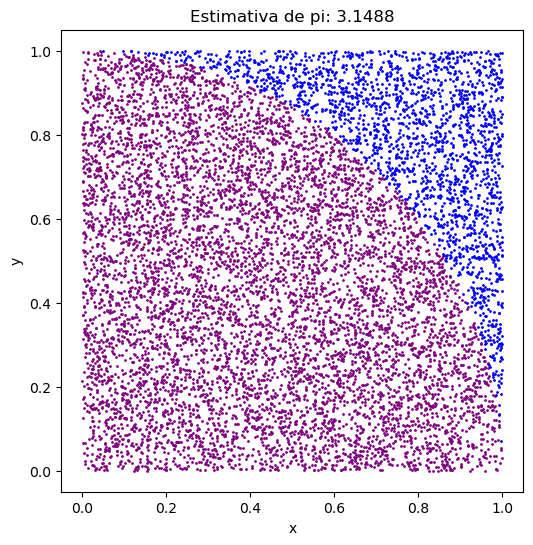

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def pi_monte_carlo(N, retorna_pontos = False):
    '''
    Calcula uma estimativa de pi usando o método de Monte Carlo.
    Temos um círculo de raio 1 inscrito em um quadrado de lado 2.
    A área considerada é a do primeiro quadrante do círculo.
    A área do círculo é pi*r^2 e a do quadrado é (2r)^2 = 4.


    Args:
        N: número de pontos a serem gerados.
        Ac: Área do círculo.
        Aq: Área do quadrado.
        estimativa_pi: estimativa de pi.
    Returns:    
        estimativa_pi: estimativa de pi.
        Plota gráfico com os números aleatórios
    '''




rng = np.random.default_rng(seed=42)#Gera números aleatórios
N = 10000 #Quantidade de números aleatórios gerados
x = rng.uniform(0,1,N) #pontos no eixo x
y = rng.uniform(0,1, N) #pontos no eixo y
r = np.sqrt(x**2 + y**2)
dentro = (r <= 1)
fora = ~dentro
estimativa_pi = 4*sum(dentro)/N
print(estimativa_pi)

#Gráfico
retorna_pontos = True
plt.figure(figsize=(6,6))
plt.scatter(x[dentro], y[dentro], color='purple', s=1, label=f'Dentro do círculo ({np.sum(dentro)} pontos)')
plt.scatter(x[fora], y[fora], color='blue', s=1, label=f'Fora do círculo ({np.sum(fora)} pontos)')

plt.title('Estimativa de pi: {}'.format(estimativa_pi))
plt.xlabel('x')
plt.ylabel('y')
plt.plot()
plt.gca().set_aspect('equal')

#retorna pontos
#if retorna_pontos:
 #     return estimativa_pi, dentro, fora
 #   else:
 #       return estimativa_pi

#Arrumar eixos:
#caso 1 (todos os eixos)
#  plt.plot(...)
#  plt.gca().set_aspect('equal')

#caso 2 (cada eixo)
#  ax.plot(...)
#  ax.set_aspect('equal')


#Teste
pi_monte_carlo(2000) #Teste da função 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def pi_monte_carlo(N, retorna_pontos = False):
    '''
    Calcula uma estimativa de pi usando o método de Monte Carlo.
    Temos um círculo de raio 1 inscrito em um quadrado de lado 2.
    A área considerada é a do primeiro quadrante do círculo.
    A área do círculo é pi*r^2 e a do quadrado é (2r)^2 = 4.


    Args:
        N: número de pontos a serem gerados.
        Ac: Área do círculo.
        Aq: Área do quadrado.
        estimativa_pi: estimativa de pi.
    Returns:    
        estimativa_pi: estimativa de pi.
        Plota gráfico com os números aleatórios
    '''




rng = np.random.default_rng(seed=42)#Gera números aleatórios
N = 10000 #Quantidade de números aleatórios gerados
dentro = []
fora = []


if retorna_pontos:
        
    return estimativa_pi, dentro, fora
else:
    return estimativa_pi

for i in range(1, N+1):
    x = r = np.sqrt(x**2 + y**2)

#Gráfico
retorna_pontos = True
plt.figure(figsize=(6,6))
plt.scatter(x[dentro], y[dentro], color='purple', s=1, label=f'Dentro do círculo ({np.sum(dentro)} pontos)')
plt.scatter(x[fora], y[fora], color='blue', s=1, label=f'Fora do círculo ({np.sum(fora)} pontos)')

plt.title('Estimativa de pi: {}'.format(estimativa_pi))
plt.xlabel('x')
plt.ylabel('y')
plt.plot()
plt.gca().set_aspect('equal')


In [55]:
%timeit estimativa_pi = pi_monte_carlo(1000000) #Teste de tempo da função

74.5 ns ± 1.56 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [ ]:
dentro = []
x = [1,2,3, 4, 5, 6]
y = [7,8,9,10,11,12]

print('x:', x)
print('y:', y)

dentro.append([x[0],y[0]])

dentro.append([x[3],y[3]])

dentro.append([x[4],y[4]])

dentro = np.array(dentro)

print('Dentro:\n', dentro)

x: [1, 2, 3, 4, 5, 6]
y: [7, 8, 9, 10, 11, 12]
Dentro:
 [[ 1  7]
 [ 4 10]
 [ 5 11]]


In [ ]:
retorna_ponto.append([x[0],y[0]])

dentro = np.array(dentro)
x = np.linspace(0 ,1,  200)
y = np.linspace(0 ,1,  200)

dentro[:, 0]

(3, 2)